# 1. Imports

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GroupKFold, RandomizedSearchCV, StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2. Loading the dataset

In [21]:
dataset = pd.read_csv("../../data/processed/COEN498-691_HAR_preprocessed_dataset.csv")
df = pd.DataFrame(dataset)

In [22]:
activity_mapper = {
    'sitting': 1,
    'walking': 2,
    'running': 3,
    'lying': 4,
}

# 3. Training Random Forest classifier (all features)
**Train the model using all features in the original dataset and default hyperparameters. Use Leave-One-Subject-Out (LOSO) cross validation.**

## 3.1. Classification report and confusion matrix

Results for YL
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       234
           2       1.00      1.00      1.00       234
           3       1.00      1.00      1.00       245
           4       1.00      1.00      1.00       244

    accuracy                           1.00       957
   macro avg       1.00      1.00      1.00       957
weighted avg       1.00      1.00      1.00       957



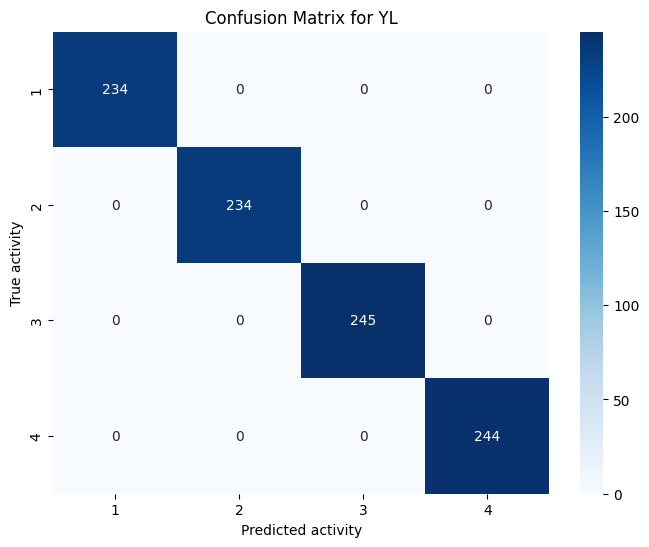

Results for ZM
Accuracy: 0.9843
Classification Report:
              precision    recall  f1-score   support

           1       0.94      1.00      0.97       253
           2       1.00      1.00      1.00       229
           3       1.00      1.00      1.00       234
           4       1.00      0.94      0.97       238

    accuracy                           0.98       954
   macro avg       0.99      0.98      0.98       954
weighted avg       0.99      0.98      0.98       954



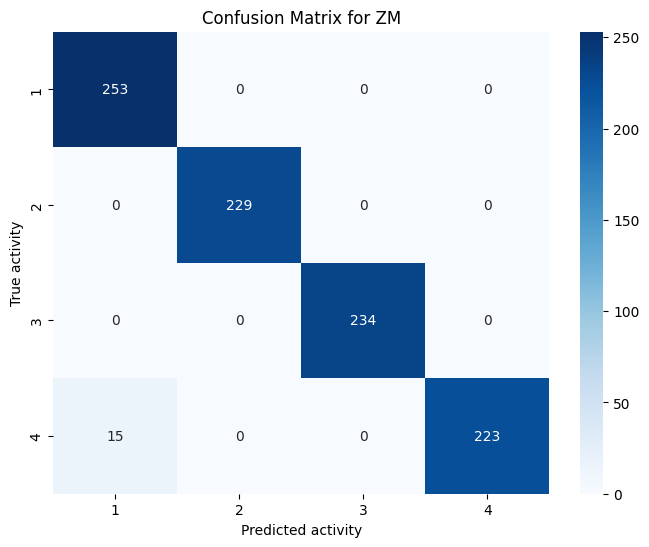

Results for YT
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       243
           2       1.00      1.00      1.00       237
           3       1.00      1.00      1.00       237
           4       1.00      1.00      1.00       237

    accuracy                           1.00       954
   macro avg       1.00      1.00      1.00       954
weighted avg       1.00      1.00      1.00       954



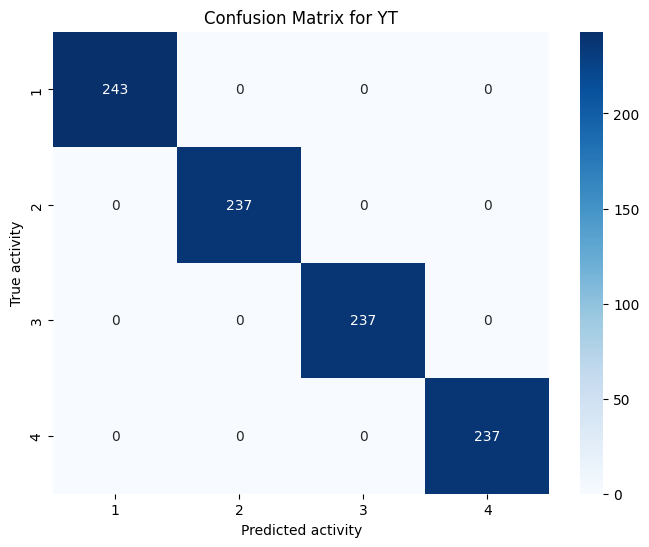

Results for VV
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       236
           2       1.00      1.00      1.00       235
           3       1.00      1.00      1.00       231
           4       1.00      1.00      1.00       248

    accuracy                           1.00       950
   macro avg       1.00      1.00      1.00       950
weighted avg       1.00      1.00      1.00       950



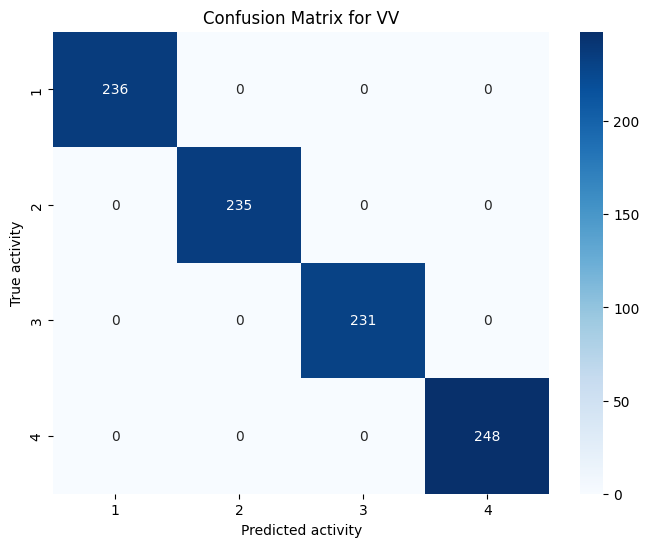

Results for LL
Accuracy: 0.9979
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       239
           2       0.99      1.00      1.00       231
           3       1.00      1.00      1.00       237
           4       1.00      1.00      1.00       229

    accuracy                           1.00       936
   macro avg       1.00      1.00      1.00       936
weighted avg       1.00      1.00      1.00       936



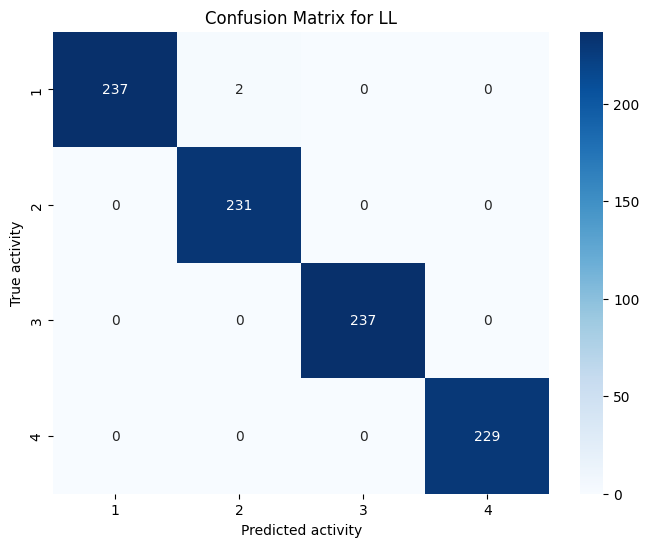

In [ ]:
groups = df['participant_id']
feature_columns = df.columns.difference(['participant_id', 'activity_id'])
activity_labels = sorted(df['activity_id'].unique())
gkf = GroupKFold(n_splits=5) 
classification_reports = []

for train_index, test_index in gkf.split(df, df['activity_id'], groups):

    train_set = df.iloc[train_index]
    test_set = df.iloc[test_index]

    X_train = train_set[feature_columns]
    y_train = train_set['activity_id']
    X_test = test_set[feature_columns]
    y_test = test_set['activity_id']

    test_participant_id = test_set['participant_id'].iloc[0]

    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports.append(report)
    print(f"Results for {test_participant_id}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification report:")
    print(classification_report(y_test, y_pred))

    # Plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, index=activity_labels, columns=activity_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {test_participant_id}')
    plt.xlabel('Predicted activity')
    plt.ylabel('True activity')
    plt.show() 


## 3.2. Average weighted F1-score

In [24]:
weighted_f1_scores = [report['weighted avg']['f1-score'] for report in classification_reports]
average_weighted_f1 = np.mean(weighted_f1_scores)
print(f"Average weighted F1-score: {average_weighted_f1:.4f}")

Average weighted F1-score: 0.9964


# 4. Model tuning with grid search
**Check if we can improve the performance of the model by selecting a subset of features and tuning hyperparameters.**

In [ ]:
parameter_grid = {
}

## 4.1. Classification report and confusion matrix

## 4.2. Average weighted F1-score